In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [ ]:
path = "./titanic-train.csv"
titanic = pd.read_csv(path)
titanic = pd.read_csv(path, index_col=0)# 

titanic=titanic.drop(labels=['Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
titanic = titanic.dropna()

titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,Q
887,0,2,male,27.0,0,0,S
888,1,1,female,19.0,0,0,S


In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
nombre_de_nan = titanic.isna().sum()
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


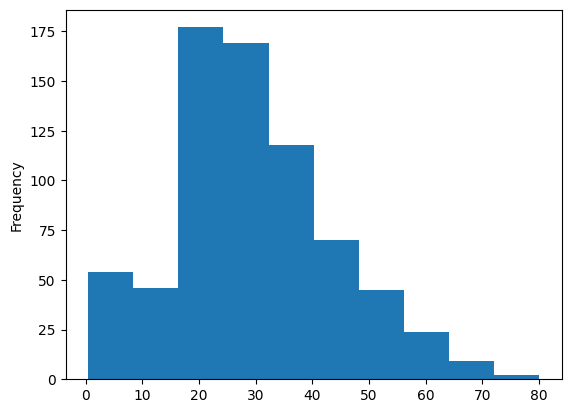

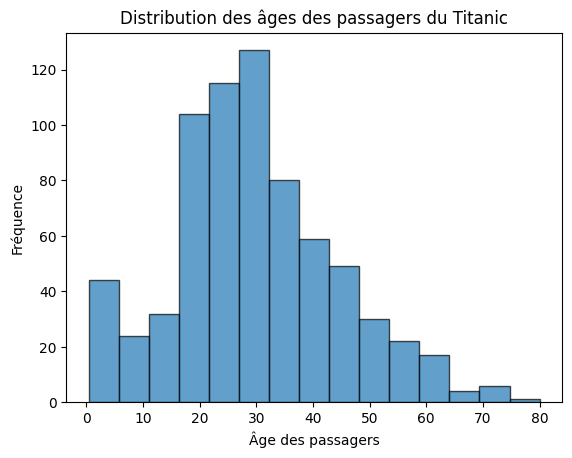

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
titanic = pd.read_csv("./titanic-train.csv")

titanic["Age"].plot.hist()


plt.figure()
titanic["Age"].plot.hist(
    bins=15,               # nombre de classes (barres)
    edgecolor="black",     # bord des barres
    alpha=0.7              # transparence
)
plt.xlabel("Âge des passagers")
plt.ylabel("Fréquence")
plt.title("Distribution des âges des passagers du Titanic")
plt.show()

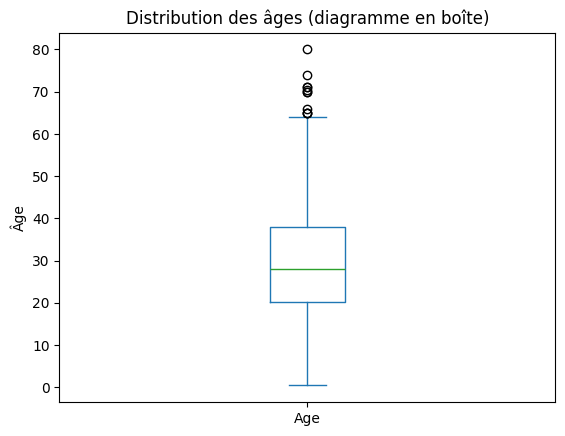

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le DataFrame Titanic
titanic = pd.read_csv("./titanic-train.csv")



titanic["Age"].plot.box()
plt.title("Distribution des âges (diagramme en boîte)")
plt.ylabel("Âge")
plt.show()


<Axes: ylabel='proportion'>

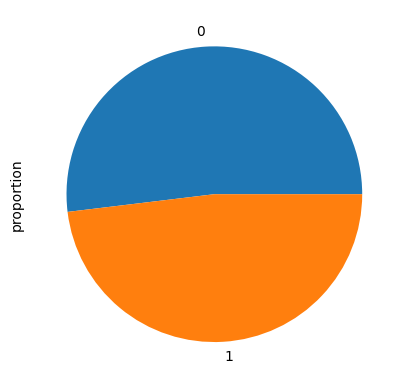

In [ ]:


titanic["Sex"].value_counts(normalize=True).plot.pie()  

In [ ]:
titanic['SibSp'].value_counts()


SibSp
0    110
1     64
2      6
3      3
Name: count, dtype: int64

<Axes: ylabel='Survived'>

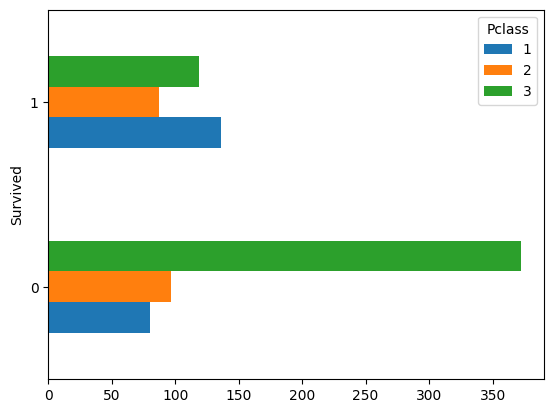

In [ ]:

titanic.groupby(['Pclass', 'Survived']).size().unstack().T.plot(kind='barh')
# titanic.groupby(['Sex', 'Survived']).size().unstack().plot(kind='barh')

In [17]:
print("taux de mortalité chez les hommes en se basant sur le sexe : ", 468/(109 + 468))
print("taux de mortalité chez les femmes en se basant sur le sexe : ", 81/(233 + 81)) 

taux de mortalité chez les hommes en se basant sur le sexe :  0.8110918544194108
taux de mortalité chez les femmes en se basant sur le sexe :  0.25796178343949044


In [18]:
print("taux de mortalité chez les hommes en se basant sur la PClass3 : ", 372/(372 + 119))
print("taux de mortalité chez les femmes en se basant sur le PClass2 : ", 97/(97 + 87)) 
print("taux de mortalité chez les femmes en se basant sur le PClass1 : ", 80/(80 + 136)) 

taux de mortalité chez les hommes en se basant sur la PClass3 :  0.7576374745417516
taux de mortalité chez les femmes en se basant sur le PClass2 :  0.5271739130434783
taux de mortalité chez les femmes en se basant sur le PClass1 :  0.37037037037037035


# Modèle de ML

In [19]:
titanic.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic = titanic.copy()

titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1}).astype(int)
titanic['Embarked'] = titanic['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2}).astype(int)
titanic = titanic.dropna() 

In [30]:
from sklearn.preprocessing import LabelEncoder
# instancier la méthode
le = LabelEncoder()
le
# demander à la méthode d'apprendre la colonne Emarked
le.fit(titanic.Embarked)
# Retrouver les classes apprises par la méthode
le.classes_
# Appliquer ce qui a été appris pour transformer la colonne
titanic['Embarked']=le.transform(titanic.Embarked)
# titanic

In [31]:
titanic.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [32]:
le.classes_

array([0, 1, 2])

In [33]:
titanic.Pclass.value_counts()

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

In [ ]:

titanic.Survived.value_counts(normalize=True)


Survived
1    0.672131
0    0.327869
Name: proportion, dtype: float64

In [ ]:

X = titanic.drop(columns='Survived')
# X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = titanic['Survived']



In [41]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y, 
                                                    random_state=42)

In [42]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_trainsf, X_testsf, y_trainsf, y_testsf = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [43]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
174,175,1,"Smith, Mr. James Clinch",0,56.0,0,0,17764,30.6958,A7,0
345,346,2,"Brown, Miss. Amelia ""Mildred""",1,24.0,0,0,248733,13.0000,F33,2
540,541,1,"Crosby, Miss. Harriet R",1,36.0,0,2,WE/P 5735,71.0000,B22,2
453,454,1,"Goldenberg, Mr. Samuel L",0,49.0,1,0,17453,89.1042,C92,0
118,119,1,"Baxter, Mr. Quigg Edmond",0,24.0,0,1,PC 17558,247.5208,B58 B60,0
...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,"Carter, Master. William Thornton II",0,11.0,1,2,113760,120.0000,B96 B98,2
707,708,1,"Calderhead, Mr. Edward Pennington",0,42.0,0,0,PC 17476,26.2875,E24,2
487,488,1,"Kent, Mr. Edward Austin",0,58.0,0,0,11771,29.7000,B37,0
717,718,2,"Troutt, Miss. Edwina Celia ""Winnie""",1,27.0,0,0,34218,10.5000,E101,2


In [44]:
y_train.value_counts(normalize=True)

Survived
1    0.671533
0    0.328467
Name: proportion, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

Survived
1    0.673913
0    0.326087
Name: proportion, dtype: float64

In [46]:
y_trainsf.value_counts(normalize=True)

Survived
1    0.693431
0    0.306569
Name: proportion, dtype: float64

In [47]:
y_testsf.value_counts(normalize=True)

Survived
1    0.608696
0    0.391304
Name: proportion, dtype: float64

# Construction de l'arbre 

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
# sélection automatique des colonnes de type int64 ou float64
numeric_cols = titanic.select_dtypes(include=['int64', 'float64']).columns
X = titanic[numeric_cols].drop(columns='Survived')
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [62]:
# Quelles sont les classes apprises par l'algo
# tree.classes_
# print(tree.max_depth)
# tree.criterion
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classes apprises :", tree.classes_)
print("Critère de l'arbre :", tree.criterion)
print("Profondeur réelle de l'arbre :", tree.get_depth())


y_pred = tree.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Exactitude (accuracy) :", accuracy)
print("Matrice de confusion :\n", cm)
print("Rapport de classification :\n", report)

Classes apprises : [0 1]
Critère de l'arbre : gini
Profondeur réelle de l'arbre : 12
Exactitude (accuracy) : 0.7297297297297297
Matrice de confusion :
 [[ 9  5]
 [ 5 18]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.78      0.78      0.78        23

    accuracy                           0.73        37
   macro avg       0.71      0.71      0.71        37
weighted avg       0.73      0.73      0.73        37



In [63]:
y_test.values

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat


array([[ 9,  5],
       [ 5, 18]])

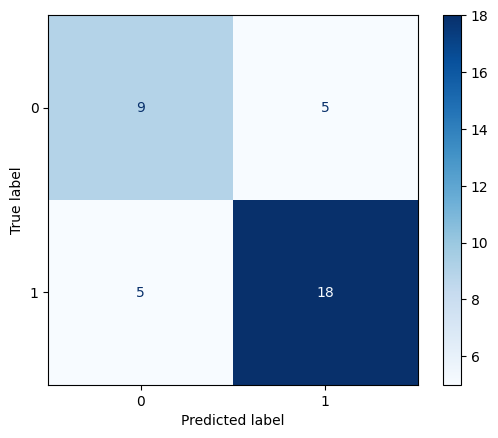

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = tree.classes_.astype(str)  

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.show()


In [68]:
(80 + 51) / (80 + 26 + 21 + 51)  

0.7359550561797753

In [69]:
y_test.value_counts() 

Survived
1    23
0    14
Name: count, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc


0.7297297297297297

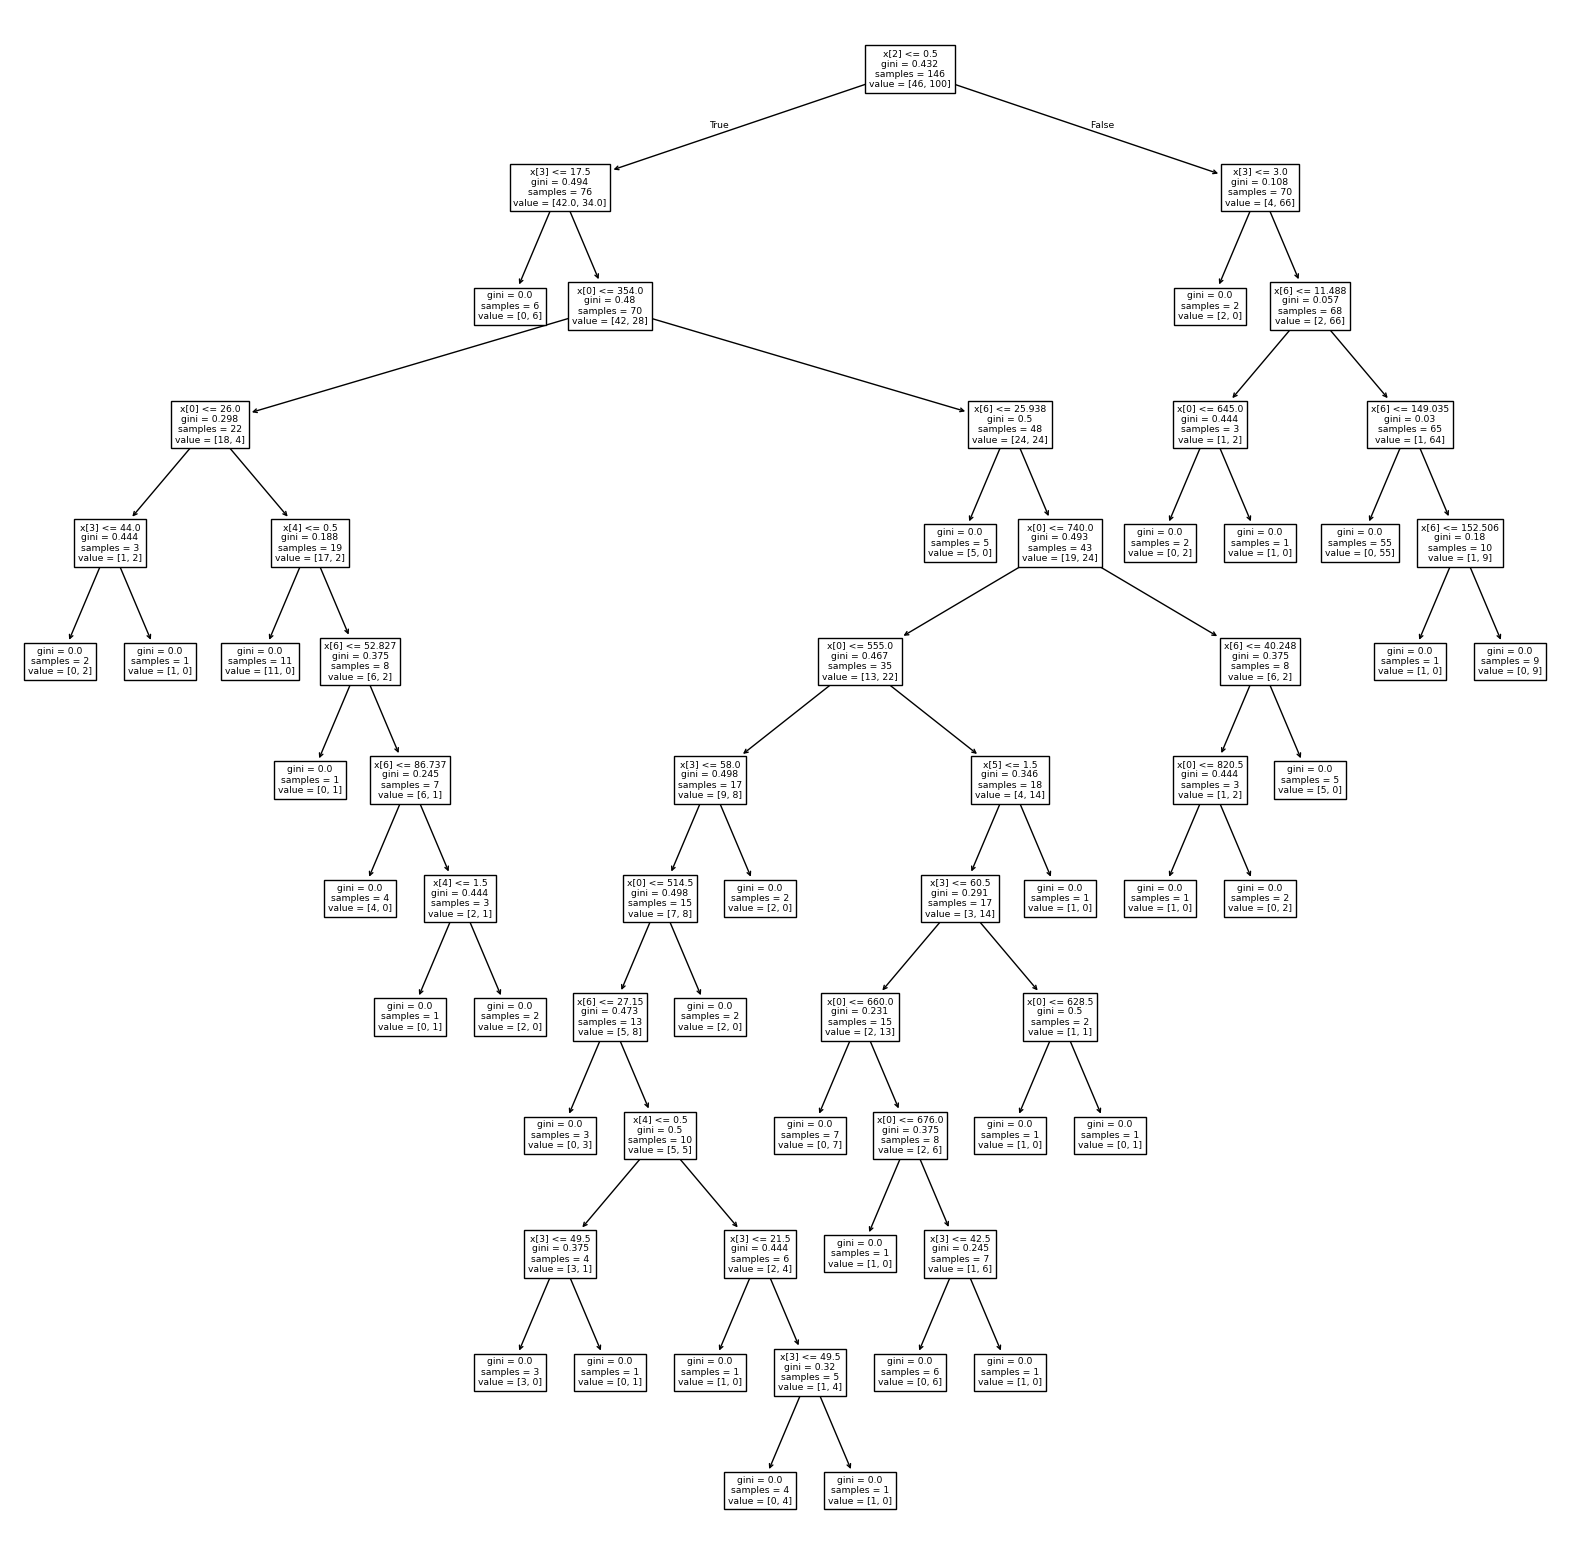

In [ ]:

from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)


In [ ]:
# Réccuperer les régles (rules) pour determiner si l'indi est Surv ou nn !  
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)


|--- Sex <= 0.50
|   |--- Age <= 17.50
|   |   |--- class: 1
|   |--- Age >  17.50
|   |   |--- PassengerId <= 354.00
|   |   |   |--- PassengerId <= 26.00
|   |   |   |   |--- Age <= 44.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  44.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- PassengerId >  26.00
|   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |--- Fare <= 52.83
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  52.83
|   |   |   |   |   |   |--- Fare <= 86.74
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  86.74
|   |   |   |   |   |   |   |--- SibSp <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- SibSp >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |--- PassengerId >  354.00
|   |   |   |--- Fare <= 25.94
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  25.94
|   |   |

In [ ]:


scores=[]
for max_depth in range(2, 10) : 
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)
scores    

[0.8108108108108109,
 0.8108108108108109,
 0.7297297297297297,
 0.7297297297297297,
 0.8378378378378378,
 0.7567567567567568,
 0.7837837837837838,
 0.8378378378378378]

In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définition de la grille de paramètres à tester
param_grid = {
    "max_depth": list(range(2, 10)),      
    "criterion": ["gini", "entropy"]      
}

# Initialisation de l’estimateur de base (arbre de décision)
dtc = DecisionTreeClassifier(random_state=42)

# Configuration de la recherche sur grille : 3 plis de validation croisée
grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=3,               
    n_jobs=-1,          
    scoring='accuracy'  )

#recherche
grid_search.fit(X_train, y_train)

# Estimation optimale et paramètres associés
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Meilleur score de validation croisée : {best_score:.4f}")
print(f"Meilleurs hyperparamètres : {best_params}")


Meilleur score de validation croisée : 0.7401
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 5}


In [77]:
scores

[0.8108108108108109,
 0.8108108108108109,
 0.7297297297297297,
 0.7297297297297297,
 0.8378378378378378,
 0.7567567567567568,
 0.7837837837837838,
 0.8378378378378378]

In [ ]:
X_train.groupby('Sex').size() 


Sex
0    76
1    70
dtype: int64

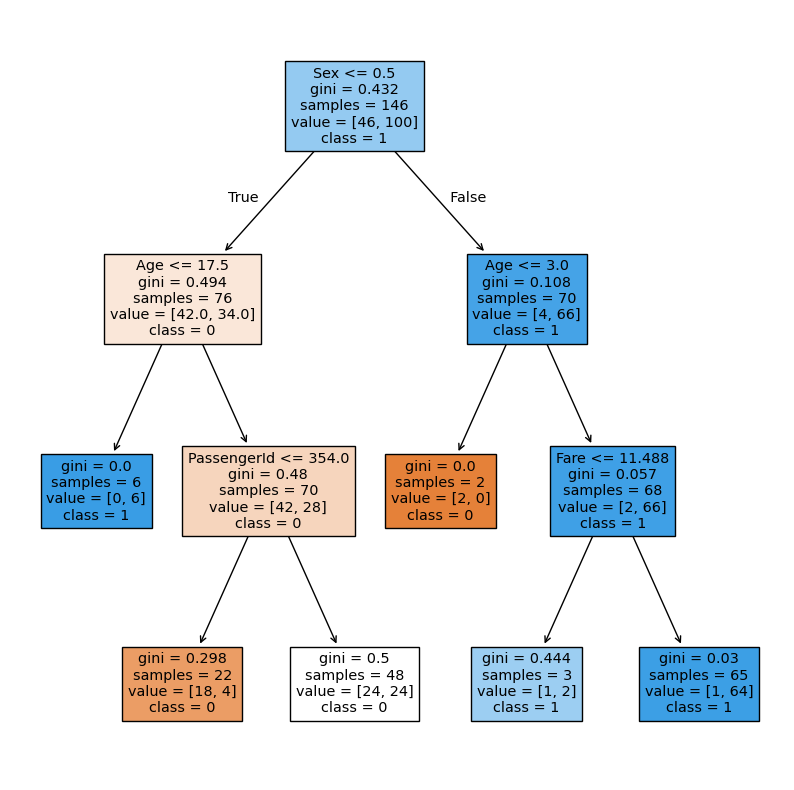

In [79]:
# Algo optimal pr les besoins du plot de l'arbre
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
tree_titanic = plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'] )

# Extraire les rules

In [80]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- Sex <= 0.50
|   |--- Age <= 17.50
|   |   |--- class: 1
|   |--- Age >  17.50
|   |   |--- PassengerId <= 354.00
|   |   |   |--- class: 0
|   |   |--- PassengerId >  354.00
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Age <= 3.00
|   |   |--- class: 0
|   |--- Age >  3.00
|   |   |--- Fare <= 11.49
|   |   |   |--- class: 1
|   |   |--- Fare >  11.49
|   |   |   |--- class: 1



# Extraire les rules (d'une façon élègante)

In [84]:

from sklearn.tree import _tree
import numpy as np

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules
